# Aim 

Lift projective indecomposables (equiv., primitive idempotents) from $\mathbb{F}_5A_5$ to $\mathbb{Z}_{(5)}A_5 \subset \mathbb{Q}A_5$. 

Some character-related details are summarised below.

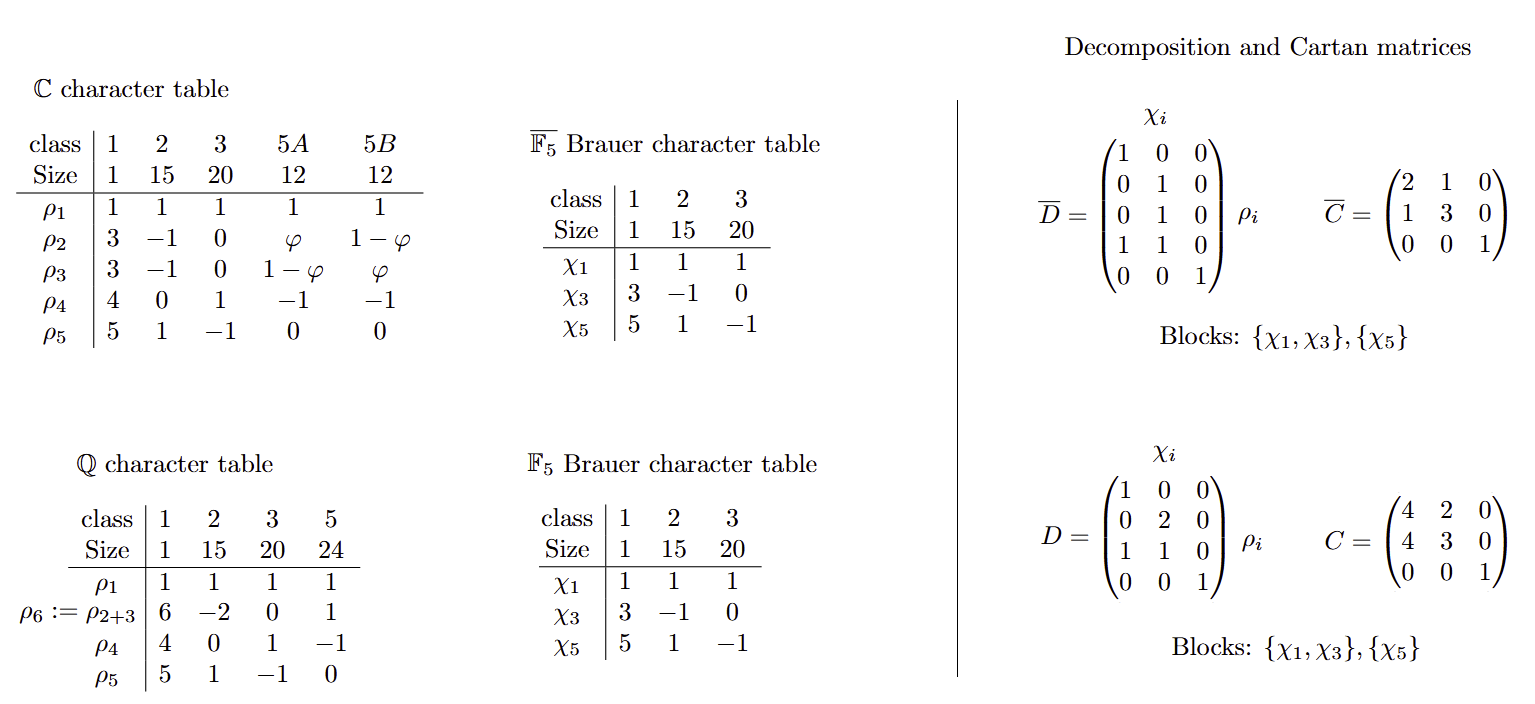

$\mathbb{F}_3A_5$ has block structure $B_0 \oplus B_1$, where $B_0$ is the principal block (containing $\chi_1$, $\chi_3$,...), and where $B_1$ is semisimple. 

- $B_0 \cong P(\chi_1) \oplus P(\chi_3)^{\oplus 3}$, where $P(-)$ denotes projective cover.
- $[P(\chi_1)] = 2[\chi_1] + [\chi_3] = [\rho_1] + [\rho_4]$ (projective indecomposable of dimension 5)
- $[P(\chi_3)] = [\chi_1] + 3[\chi_3] = [\rho_4] + [\rho_6]$  (projective indecomposable of dimension 10)
- $\dim(B_0) = 1 \times 5 + 3 \times 10 = 35$

- $B_1$ is semisimple. Indeed, $B_1 \cong P(\chi_5)^{\oplus 5} = (\chi_5)^{\oplus 5} \cong M_{5 \times 5}(\mathbb{F}_5)$.
- $\dim(B_1) = 5 \times 5 = 25$

# Quickly addressing the semisimple block, $B_1$.

Lifting $P(\chi_5)$ is straightforward, as the block is semisimple. 

Using a bar, $\overline{\hspace{1ex}}$, to denote "reduction modulo 5". We have $\overline{\rho_5} = \chi_5$. 

The construction of an idempotent in $\mathbb{Q}A_5$ corresponding to $\rho_5$ can be achieved using Young symmetrisers (in $S_5$). We find the Young symmetriser of one of the $5$-diml irreducible representation of $S_5$, $V$ (due to the fact that $\text{Res}_{A_5}^{S_5}(V) \cong \rho_5$). 

A straightforward modification of the symmetriser associated to $V$ produces the required idempotent in $A_5$. 

The details are below.

In [97]:
S5 = groups.permutation.Symmetric(5)
QS = GroupAlgebra(S5, QQ)
sgn_rep = SymmetricGroupRepresentation([1]*5)
sgn = sgn_rep.to_character()
A5 = AlternatingGroup(5)
irrA5 = A5.irreducible_characters()

'''one of the 5d reps of S_5 corresponds to tableau
[1][2]
[3][4]
[5]
'''

#Young symmetriser is y=ab, where a and b are row and column (anti) symmetrisers
a5 = sum(QS(g) for g in S5.stabilizer([1,2],"OnSets").stabilizer([3,4],"OnSets"))
b5 = sum(int(sgn(g))*QS(g) for g in S5.stabilizer([1,3,5],"OnSets"))
y5 = a5*b5
f5 = 1/24*y5
assert f5**2 == f5

#To obtain idempotent of A5, we twist f5 by sign, say f5_twisted, and compute f5 + f5_twisted
f5_twisted = sum(coeff*int(sgn(S5(element)))*QS(element) for (element, coeff) in f5)
e5 = f5 +f5_twisted
assert e5**2 == e5

print(f"e5 = f5 + f5* (idempotent in A_5) is:\n\n{e5}\n")
print(f"Its values on irreducible characters of A_5 are:\n\n{[(f"ρ{indx}", sum(coeff*char(A5(grp_ele)) for (grp_ele,coeff) in e5)) for (indx,char) in enumerate(irrA5,1)]}")

e5 = f5 + f5* (idempotent in A_5) is:

1/12*() - 1/12*(3,4,5) - 1/12*(2,4,3) + 1/12*(2,4)(3,5) + 1/12*(1,2)(3,4) - 1/12*(1,2)(3,5) - 1/12*(1,2,3) + 1/12*(1,2,3,4,5) - 1/12*(1,2,5) + 1/12*(1,2,5,3,4) - 1/12*(1,3,4) + 1/12*(1,3,5) + 1/12*(1,3)(2,4) - 1/12*(1,3,2,4,5) + 1/12*(1,4,5,3,2) - 1/12*(1,4,2) + 1/12*(1,4)(2,3) - 1/12*(1,4,2,3,5) - 1/12*(1,4,2,5,3) + 1/12*(1,4,3,2,5) + 1/12*(1,5,3) - 1/12*(1,5)(3,4) - 1/12*(1,5,3,2,4) + 1/12*(1,5)(2,4)

Its values on irreducible characters of A_5 are:

[('ρ1', 0), ('ρ2', 0), ('ρ3', 0), ('ρ4', 0), ('ρ5', 1)]


# Finding primitive idempotents in the principal block, $B_0$.

Our stratgey will be to find primitive idempotents $\overline{e} \in \mathbb{F}_5A_5$. Lift them to the group ring over the $5$-adic numbers $\hat{\mathbb{Z}_5}A_5$ (which is always possible since $\hat{\mathbb{Z}_5}$ is complete), and then check that, in fact, the $5$-adic coefficients are rational numbers.

To do this, we need to find primitive idempotents. This is achieved as follows:

- Find $CI_1$ and $CI_0$ -- the central idempotents corresponding to the blocks $B_0$ and $B_1$, respectively. For $B_1$, this is just $CI_1 = \frac{\rho_{5}(1)}{|G|}\displaystyle \sum_{g \in G} \overline{\rho_{5}(g)}g$. For $B_0$, define $CI_0 = 1 - CI_1$.   
- Take subgroup $H \cong C_3 \subset A_5$, and take the idempotent in $\mathbb{Q}H \subset \mathbb{Q}A_5$ associated to trivial representation (of $H$). (The denominator will be $|C_3| = 3$, importantly, it doesn't contain any $5$s)
- Reduce modulo $5$ to obtain element of $\mathbb{F}_5H \subset \mathbb{F}_5A_5$. 
- Multiply by $CI_0$ to project to principal block. Call the resulting idempotent $\overline{x}$.
- See what we get, and go from there...

These first four steps are carried out below.

In [98]:
FA = GroupAlgebra(A5, GF(5))

#Central idempotent for block B1 is given by conjugacy class sums on character values of \rho_5 = (5,1,-1,0,0) for classes 1,2,3,5A,5B respectively
CI_1_char_values = [5,1,-1,0,0]
conj_classes_A5 = A5.conjugacy_classes() # these classes are in the order 1,2,3,5,5, so order is compatible with above

CI_1 = GF(5)(5/60)*sum(val * FA(ele) for (val, ccl) in zip(CI_1_char_values,conj_classes_A5) for ele in ccl)
CI_0 = 1 - CI_1

assert CI_1**2 == CI_1
assert CI_0**2 == CI_0

A5_subgroup_C3 = [H for H in A5.subgroups() if H.order() == 3]
H = A5_subgroup_C3[0]
H_triv_idempotent = GF(5)(1/H.order())*sum(FA(ele) for ele in H)

assert H_triv_idempotent**2 == H_triv_idempotent
xbar = H_triv_idempotent * CI_0

We have a block decomposition of $B_0$ given by the idempotent $\overline{x}$:

$$B_0 = B_0\overline{x} \oplus B_0(CI_0 - \overline{x}) = \mathbb{F}_5A_5\overline{x} \oplus \mathbb{F}_5A_5(CI_0-\overline{x})$$

We now find dimensions of these summands. 

For a given idempotent $e$, we find the dimension of $\mathbb{F}_5A_5e$ by finding the rank of the $60 \times 60$ matrix associated to the linear transformation $L(x) = xe$, $x \in \mathbb{F}_5A_5$ with the obvious basis of $\mathbb{F}_5A_5$.

In [99]:
def Ae_matrix_rank(e, two_sided = False,return_matrix = False):
    """
    Given idempotent e, find the dimension of F_5A_5e if two_sided = False, and eF_5A_5e if two_sided = True.
    If return_matrix = True, the matrix is returned, rather than its rank.
    """
    if two_sided:
        spanning_set = [e * g * e for g in A5]
    else:
        spanning_set = [g * e for g in A5]

    L_2d_array = []
    for ele in spanning_set:
        element_of_spanning_set_dict = ele.monomial_coefficients() #dict of form {'<grp_element>': <coeff>}
        coeffs_of_element_in_spanning_set = []
        for g in A5:
            try:
                coeffs_of_element_in_spanning_set.append(element_of_spanning_set_dict[g])
            except:
                coeffs_of_element_in_spanning_set.append(0)
        L_2d_array.append(coeffs_of_element_in_spanning_set)
        
    L_matrix = Matrix(GF(5), L_2d_array)
    rank_of_L_matrix = L_matrix.rank()
    if return_matrix:
        return L_matrix
    return rank_of_L_matrix

print(f"dimension of A(xbar) is {Ae_matrix_rank(xbar)}")
print(f"dimension of A(CI_0-xbar) is {Ae_matrix_rank(CI_0-xbar)}")

dimension of A(xbar) is 15
dimension of A(CI_0-xbar) is 20


- $B_0\overline{x} = \mathbb{F}_5A_5\overline{x}$ has dimension $15$, and therefore $B_0\overline{x} \cong P(\chi_1) \oplus P(\chi_3)$.

- $B_0(CI_0 - \overline{x}) = \mathbb{F}_5A_5(CI_0 - \overline{x})$ has dimension $20$, and therefore $B_0(CI_0 - \overline{x}) \cong P(\chi_3)^{\oplus 2}$. 

Moreover...

In fact, (primitive) idempotents corresponding to $P(\chi_1)$ and $P(\chi_3)$ must lie in the **two sided ideal** $\overline{x}(B_0)\overline{x} = \overline{x}(\mathbb{F}_5A_5)\overline{x}$.

Indeed, a (primitive) idempotent $e$ yields a (indecomposable) module $Ae$, and $\text{End}_A(Ae) = eAe$, so $e \in \text{End}_A(Ae)$. Moreover, $\text{End}(P) \subset \text{End}(P \oplus Q)$.

Next up...

We construct a basis of $\overline{x}(\mathbb{F}_5A_5)\overline{x}$ (it turns out that the dimension is 7, see below).

In [100]:
print(f"dimension of xbar(F_5A_5)xbar is {Ae_matrix_rank(xbar, two_sided = True)}\n") #dimension is 7

def coeffs_of_basis_two_sided(e):
    """
    Given idempotent e, finds the coefficients of the basis of eAe, where A = F_5A_5
    (ordering of coeffs follows order of [g for g in AlternatingGroup(5)])
    """
    coeff_matrix = Ae_matrix_rank(e, two_sided = True, return_matrix = True)
    
    return [row for row in coeff_matrix.rref().rows() if row.is_zero() == False]

xAx_basis_coeffs = coeffs_of_basis_two_sided(xbar)
xAx_basis = [sum(coeff * FA(g) for (coeff,g) in zip(coeffs,A5)) for coeffs in xAx_basis_coeffs]

dimension of xbar(F_5A_5)xbar is 7



We have a basis of $\overline{x}(\mathbb{F}_5A_5)\overline{x}$ (of dimension $7$). There are $|\{0,1,2,3,4\}|^7 = 5^{7} = 78125$ elements. We brute force them to find idempotents, $e$, stopping once we find one such that $\dim(\mathbb{F}_5A_5e) = 5$ and $\dim(\mathbb{F}_5A_5e) = 10$

In [101]:
possible_coeffs = cartesian_product([[0,1,2,3,4]] * 7)

idem_P1 = None
idem_P3 = None

for coeffs in possible_coeffs:
    test_element = sum(coeff * ele for (coeff,ele) in zip(coeffs, xAx_basis))
    if test_element**2 == test_element:
        if (not idem_P1) and Ae_matrix_rank(test_element) == 5:
           idem_P1 = test_element
        if (not idem_P3) and Ae_matrix_rank(test_element) == 10:
           idem_P3 = test_element
        if idem_P1 and idem_P3:
            break

assert idem_P1**2 == idem_P1
assert Ae_matrix_rank(idem_P1) == 5

assert idem_P3**2 == idem_P3
assert Ae_matrix_rank(idem_P3) == 10

print(f"A primitive idempotent of F5A5 yielding the indecomposable projective P(chi_1) of dimension 5 is:\n\n{idem_P1}\n\n")
print(f"A primitive idempotent of F5A5 yielding the indecomposable projective P(chi_3) of dimension 10 is:\n\n{idem_P3}")

A primitive idempotent of F5A5 yielding the indecomposable projective P(chi_1) of dimension 5 is:

3*() + 3*(3,4,5) + 3*(3,5,4) + 3*(1,3)(4,5) + 3*(1,3,4) + 3*(1,3,5) + 3*(1,4,3) + 3*(1,4,5) + 3*(1,4)(3,5) + 3*(1,5,3) + 3*(1,5,4) + 3*(1,5)(3,4)


A primitive idempotent of F5A5 yielding the indecomposable projective P(chi_3) of dimension 10 is:

() + (3,4,5) + (3,5,4) + 4*(1,2)(4,5) + 4*(1,2)(3,4) + 4*(1,2)(3,5)


# Lifting primitive idempotents from $\mathbb{F}_5A_5$ to $\mathbb{Z}_{(5)}A_5$

To lift, we lift to the group algebra over the $5$-adic integers, $\hat{\mathbb{Z}_5}A_5$, and then check if, in fact, our coefficients are rational. A $5$-adic integer with repeating digits is rational.

### Lifting from $\mathbb{F}_5A_5$ to $\hat{\mathbb{Z}_5}A_5$

As $\hat{\mathbb{Q}_5}$ (the $5$-adic numbers) are complete, it is always possible to perform such a lift. 

In practice, we lift to $\mathbb{Z}/5^c\mathbb{Z}$, which will give us the first $c$ coefficients of the lift.

As we are hoping for the coefficients to repeat  (since we work under the assumption that our $5$-adic coefficients are in fact rational), we hope to spot a repeating pattern in the first $c$ coefficients, for some reasonably small $c$.

Then, assuming repeating patterns exist (spoiler: they do). We calculate the rational coefficients and check idempotency. 

### The iterative process (how to actually lift).

- We start with any lift from $\mathbb{F}_5A_5$ to $\mathbb{Z}_{(5)}A_5 \subset \mathbb{Q}A_5$. The naive lift induced from set map $\mathbb{F}_5 \rightarrow \mathbb{Z}; \{\overline{0},\overline{1},\overline{2},\overline{3},\overline{4}\} \mapsto \{0,1,2,3,4\}$ will do. 
- Denote this initial lift by $e_0$. Then $e_0 = \bar{e}\, (\text{mod } 5)$, but $e_0$ is (almost certainly) not an idempotent.
- Iteratively define $e_{k+1} = 3e_k^2 - 2e_k^3$. 
- If $e_k \equiv \bar{e} \, (\text{mod } 5)$, then $e_{k+1}\equiv 3e_k^2 - 2e_k^3 \equiv 3\overline{e}^2 - 2\overline{e}^3 \equiv \overline{e} \, (\text{mod } 5) $. So, by induction, all the $e_i$ are lifts of $\bar{e}$.
- Define $\delta_k = e_k^2 - e_k$. This is the error/defect term (a measure of how far $e_k$ is for being idempotent).
- Claim: If $\delta_k \equiv 0\, (\text{mod } 5^n)$ then $\delta_{k+1} \equiv 0\, (\text{mod } 5^{2n})$. The proof is to show that $\delta_{k+1} = \delta_k^2(\text{stuff})$.
- Thus, $\delta_0 \equiv 0\, (\text{mod } 5^1)$, $\delta_1 \equiv 0\, (\text{mod } 5^2)$, $\delta_2 \equiv 0\, (\text{mod } 5^{2^2} = 5^4)$, $\delta_3 \equiv 0\, (\text{mod } 5^{2^3} = 5^8)$, etc
- If we work in the ring $\mathbb{Z}/5^c\mathbb{Z}$, then this iterative process stabilises whenever $K$ is such that $2^K > c$.


- This process will find the first $c$ $5$-adic coefficients of each element $g \in A_5$ of the lift.




In [102]:
def refine_lift(initial_lift, num_coeffs):
    c = num_coeffs
    N = 5**c
    RA = GroupAlgebra(A5,IntegerModRing(N))
    old_lift = None
    current_lift = sum(int(coeff)*RA(ele) for (ele,coeff) in initial_lift.monomial_coefficients().items())
    while current_lift != old_lift:
        old_lift = current_lift
        current_lift = 3*current_lift**2 - 2*current_lift**3
    return current_lift

def int_coeffs_to_5adic(ele_coeff_dict, num_coeffs):
    """
    Takes a dictionary with entries <str>:<int> and computes the first `num_coeffs` terms of 5-adic expansion of <int> (this is just base 5 number)
    """
    def int_to_base5(n):
        n %= 5**num_coeffs #our values will only be accurate to `num_coeffs` 5-adic places, so anything beyond 5^num_coeffs is nonsense
        expansion = ''
        for i in range(num_coeffs):
            expansion = str(n%5)+expansion
            n = n // 5
        return '...'+expansion
    expansion_dict = dict()
    for key,val in ele_coeff_dict.items():
        expansion_dict[key] = int_to_base5(int(val))
    return expansion_dict

def rational_from_repeating_5_adic(expansion:str):
    """
    Takes a 5-adic expansion (passed as a string) of the form (ab)c and returns the fraction it represents.
    x = (ab)abc
    25x = (ab)c00(everything shifts 2 places to the left, since 25=5^2)
    => 24x = 25c-(25a+5b+c)
    => x = 1/24 * (25c-(25a+5b+c))
    """
    a,b,c = map(int,expansion[-3:])
    numerator = 25*c - (25*a+5*b+c)
    return numerator/Integer(24)

## Lifting the idempotent in $\mathbb{F}_5A_5$ associated to $P(\chi_1)$ (of dimension 5).

In [103]:
###############
# For idem_P1 #
###############

import pandas as pd


QA = GroupAlgebra(A5,QQ)
num_coeffs_of_accuracy_in_lift_refinement = 40

#obtain initial lift, refine it, then write coefficients 3-adically.
initial_lift_of_idem_P1 = sum(int(coeff)*QA(g) for (g,coeff) in idem_P1.monomial_coefficients().items())
refined_lift_of_idem_P1 = refine_lift(initial_lift_of_idem_P1, num_coeffs_of_accuracy_in_lift_refinement)
refined_lift_of_idem_P1_5_adic_coefficients = int_coeffs_to_5adic(refined_lift_of_idem_P1.monomial_coefficients(), num_coeffs_of_accuracy_in_lift_refinement)

idem_P1_lift_df = pd.DataFrame.from_dict(refined_lift_of_idem_P1_5_adic_coefficients, orient='index',columns=['5-adic coefficients'])
idem_P1_lift_df['rational_coefficients'] = idem_P1_lift_df['5-adic coefficients'].apply(rational_from_repeating_5_adic)
idem_P1_lift_df.index.name = "A5 element"

rational_lift_P1 = (idem_P1_lift_df.index.to_series().apply(lambda x: QA(x)) * idem_P1_lift_df['rational_coefficients']).sum()

#Idempotent?
assert rational_lift_P1**2 == rational_lift_P1
#Does our rational lift reduce modulo 5 to idem_P1?
assert sum(GF(5)(coeff)*FA(ele) for (ele,coeff) in rational_lift_P1.monomial_coefficients().items()) == idem_P1

print(f"Rational idempotent associated to rational lift of P(chi_1) (of dimension 5) is\n\n{rational_lift_P1}\n\n")
print(f"A dataframe displaying 5-adic coefficients, as well as rational coefficients for each term in the rational lift:\n\n{idem_P1_lift_df}\n")

Rational idempotent associated to rational lift of P(chi_1) (of dimension 5) is

1/12*() + 1/12*(3,4,5) + 1/12*(3,5,4) + 1/12*(1,3)(4,5) + 1/12*(1,3,4) + 1/12*(1,3,5) + 1/12*(1,4,3) + 1/12*(1,4,5) + 1/12*(1,4)(3,5) + 1/12*(1,5,3) + 1/12*(1,5,4) + 1/12*(1,5)(3,4)


A dataframe displaying 5-adic coefficients, as well as rational coefficients for each term in the rational lift:

                                    5-adic coefficients rational_coefficients
A5 element                                                                   
(1,4,5)     ...4242424242424242424242424242424242424243                  1/12
(3,5,4)     ...4242424242424242424242424242424242424243                  1/12
(1,3,5)     ...4242424242424242424242424242424242424243                  1/12
(3,4,5)     ...4242424242424242424242424242424242424243                  1/12
(1,4,3)     ...4242424242424242424242424242424242424243                  1/12
()          ...4242424242424242424242424242424242424243                  1/

## Lifting the idempotent in $\mathbb{F}_5A_5$ associated to $P(\chi_3)$ (of dimension 10).

In [104]:
###############
# For idem_P3 #
###############

#obtain initial lift, refine it, then write coefficients 3-adically.
initial_lift_of_idem_P3 = sum(int(coeff)*QA(g) for (g,coeff) in idem_P3.monomial_coefficients().items())
refined_lift_of_idem_P3 = refine_lift(initial_lift_of_idem_P3, num_coeffs_of_accuracy_in_lift_refinement)
refined_lift_of_idem_P3_5_adic_coefficients = int_coeffs_to_5adic(refined_lift_of_idem_P3.monomial_coefficients(), num_coeffs_of_accuracy_in_lift_refinement)

idem_P3_lift_df = pd.DataFrame.from_dict(refined_lift_of_idem_P3_5_adic_coefficients, orient='index',columns=['5-adic coefficients'])
idem_P3_lift_df['rational_coefficients'] = idem_P3_lift_df['5-adic coefficients'].apply(rational_from_repeating_5_adic)
idem_P3_lift_df.index.name = "A5 element"

rational_lift_P3 = (idem_P3_lift_df.index.to_series().apply(lambda x: QA(x)) * idem_P3_lift_df['rational_coefficients']).sum()

#Idempotent?
assert rational_lift_P3**2 == rational_lift_P3
#Does our rational lift reduce modulo 5 to idem_P3?
assert sum(GF(5)(coeff)*FA(ele) for (ele,coeff) in rational_lift_P3.monomial_coefficients().items()) == idem_P3

print(f"Rational idempotent associated to rational lift of P(chi_3) (of dimension 10) is\n\n{rational_lift_P3}\n\n")
print(f"A dataframe displaying 5-adic coefficients, as well as rational coefficients for each term in the rational lift:\n\n{idem_P3_lift_df}\n")

Rational idempotent associated to rational lift of P(chi_3) (of dimension 10) is

1/6*() + 1/6*(3,4,5) + 1/6*(3,5,4) - 1/6*(1,2)(4,5) - 1/6*(1,2)(3,4) - 1/6*(1,2)(3,5)


A dataframe displaying 5-adic coefficients, as well as rational coefficients for each term in the rational lift:

                                    5-adic coefficients rational_coefficients
A5 element                                                                   
()          ...4040404040404040404040404040404040404041                   1/6
(1,2)(3,4)  ...0404040404040404040404040404040404040404                  -1/6
(3,5,4)     ...4040404040404040404040404040404040404041                   1/6
(1,2)(3,5)  ...0404040404040404040404040404040404040404                  -1/6
(3,4,5)     ...4040404040404040404040404040404040404041                   1/6
(1,2)(4,5)  ...0404040404040404040404040404040404040404                  -1/6



## Checking dimensions (A sanity check).

In [105]:
"""
We have seen this function before, namely `Ae_matrix_rank` (but here the matrix is over QQ, rather than F_3).
Rather than create a distraction by adding another argument in the prior version of the function, we just redefine it... 
"""
def dimQA5e(e):
    """
    Given idempotent e, find the dimension of QA_5e
    """
    spanning_set = [g * e for g in A5]
    L_2d_array = []
    for ele in spanning_set:
        element_of_spanning_set_dict = ele.monomial_coefficients() #dict of form {'<grp_element>': <coeff>}
        coeffs_of_element_in_spanning_set = []
        for g in A5:
            try:
                coeffs_of_element_in_spanning_set.append(element_of_spanning_set_dict[g])
            except:
                coeffs_of_element_in_spanning_set.append(0)
        L_2d_array.append(coeffs_of_element_in_spanning_set)        
    L_matrix = Matrix(QQ, L_2d_array)
    rank_of_L_matrix = L_matrix.rank()
    return rank_of_L_matrix

print(f"The dimension of QA_5*(rational_lift_P1) as a Q-vector space is {dimQA5e(rational_lift_P1)}\n")
print(f"The dimension of QA_5*(rational_lift_P4) as a Q-vector space is {dimQA5e(rational_lift_P3)}")

The dimension of QA_5*(rational_lift_P1) as a Q-vector space is 5

The dimension of QA_5*(rational_lift_P4) as a Q-vector space is 10
